In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import GillespieSim as gs

In [3]:
# np.random.seed(12345)
infection_model = gs.ReactionModel(
                species = {
                    'healthy_cells': 1000,
                    'infected_cells': 1000,
                },
                propensities = {
                    'division_helthy_cells': 1.09,
                    # 'division_infected_cells': 10,

                    'infection_rate' : 1/1000,

                    'apoptosis': 0.1,
                    'infected_cell_apoptosis': 1
                },
                reactions = {
                    'cell_infection' :      ['infection_rate', 'healthy_cells', 'infected_cells'],
                    'cell_apoptosis' :      ['apoptosis', 'healthy_cells'],
                    'ic_apoptosis':         ['infected_cell_apoptosis', 'infected_cells'],
                    'cell_division' :       ['division_helthy_cells', 'healthy_cells'],
                    # 'ic_division' :         ['division_infected_cells', 'infected_cells'],
                },
                q = {
                    'cell_infection' :      {'create' : ['infected_cells'], 'destroy': ['healthy_cells']},
                    'cell_apoptosis' :      {'destroy' : ['healthy_cells', 'infected_cells']},
                    'ic_apoptosis' :        {'destroy' : ['infected_cells']},
                    'cell_division' :       {'create' : ['healthy_cells']},
                    # 'ic_division' :         {'create' : ['infected_cells']},
                }
)
tmax = 10
infection_model_sim = gs.Gillespie(reaction_model=infection_model, model_name='simulation_data/SCV2_tau_off', tmax=tmax, sampling_time=0.01, cells=100000, chunk_lenght=1000)
infection_model_sim.get_time_distribution(mode='single_switch', initial_state='on', species_name='infected_cells', threshold=0)
# infection_model_sim.simulate()

100%|██████████| 100000/100000 [00:12<00:00, 7783.80it/s]


In [4]:
df = pd.read_csv('./simulation_data/SCV2_tau_off.csv')
df

,healthy_cells,infected_cells,time,cell
0,3047,0,29.330354,0
1,3048,0,29.331185,1
2,3049,0,29.331452,2
3,3050,0,29.332144,3
4,3049,0,29.332207,4
...,...,...,...,...
99995,86678,0,32.688064,99995
99996,86679,0,32.688070,99996
99997,86680,0,32.688070,99997
99998,86679,0,32.688081,99998


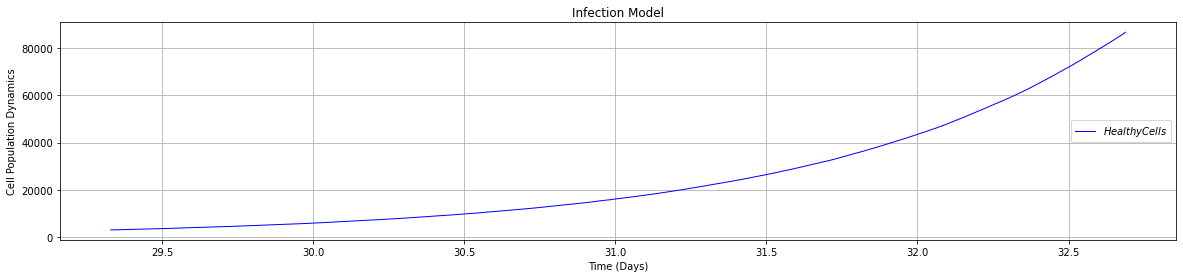

In [5]:
df = pd.read_csv('./simulation_data/SCV2_tau_off.csv')

fig, ax = plt.subplots()
ax.plot(df['time'], df['healthy_cells'], '-' ,lw=1,color='blue', label= r'$Healthy Cells$')
# ax.plot(df['infected_cells'], '-' ,color='red', label= r'$Infected Cells$')

fig.set_size_inches(20, 4)

ax.set_title('Infection Model')

ax.set_xlabel('Time (Days)')
ax.set_ylabel('Cell Population Dynamics')
ax.legend(loc=5)

# ax.set_yscale('log')
ax.grid(True)
# ax.set_ylim(0,5)


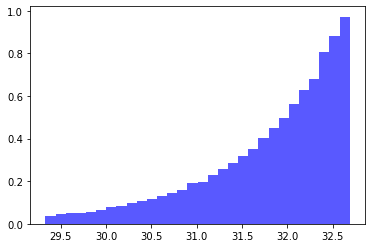

In [6]:
plt.hist(df['time'], bins=30, density=True, color='blue', alpha=0.65);
# plt.yscale('log')

In [10]:
# np.random.seed(12345)
infection_model = gs.ReactionModel(
                species = {
                    'healthy_cells': 1000,
                    'infected_cells': 1,
                },
                propensities = {
                    'division_helthy_cells': 1.1,
                    # 'division_infected_cells': 10,

                    'infection_rate' : 1/10, # Infects 1 of 1000 cells

                    'apoptosis': 1.12, # (45.83 days (50 generations * 22 hours per division/1 generation))*1 day/24 hours
                    'infected_cell_apoptosis': 1.15
                },
                reactions = {
                    'cell_infection' :      ['infection_rate', 'healthy_cells', 'infected_cells'],
                    'cell_apoptosis' :      ['apoptosis', 'healthy_cells'],
                    'ic_apoptosis':         ['infected_cell_apoptosis', 'infected_cells'],
                    'cell_division' :       ['division_helthy_cells', 'healthy_cells'],
                    # 'ic_division' :         ['division_infected_cells', 'infected_cells'],
                },
                q = {
                    'cell_infection' :      {'create' : ['infected_cells'], 'destroy': ['healthy_cells']},
                    'cell_apoptosis' :      {'destroy' : ['healthy_cells', 'infected_cells']},
                    'ic_apoptosis' :        {'destroy' : ['infected_cells']},
                    'cell_division' :       {'create' : ['healthy_cells']},
                    # 'ic_division' :         {'create' : ['infected_cells']},
                }
)
tmax = 150
infection_model_sim = gs.Gillespie(reaction_model=infection_model, model_name='simulation_data/SCV2', tmax=tmax, sampling_time=0.1, cells=1)
# infection_model_sim.time_distribution(mode='single_switch', initial_state='on', species_name='infected_cells', threshold=0)
infection_model_sim.simulate()

100%|██████████| 1/1 [00:06<00:00,  6.09s/it]


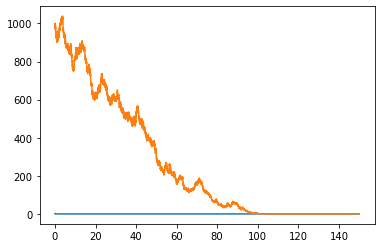

In [9]:
df = pd.read_csv('simulation_data/SCV2.csv')

plt.plot(df['time'],df['infected_cells'])
plt.plot(df['time'],df['healthy_cells'])